In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Загрузка и подготовка данных

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv')
df.head()

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN


In [5]:
df['ClientSince'].unique()

array([2023, 2024])

In [6]:
df['Loyalty'] = np.where(df['ClientSince'] == 2023, 'Old', 'New')

In [7]:
df.shape

(20000, 8)

In [8]:
group_a = df[df['A'] == 1]
group_a.shape

(300, 8)

In [9]:
group_b = df[df['B'] == 1]
group_b.shape

(500, 8)

In [10]:
df[df['Purchased'] == 1].shape

(1327, 8)

In [11]:
group_a[group_a['Purchased'] == 1].shape

(33, 8)

In [12]:
group_b[group_b['Purchased'] == 1].shape

(66, 8)

In [13]:
group_c = df[(df['A'] != 1)&(df['B'] !=1)]
group_c.shape

(19200, 8)

In [14]:
group_c[group_c['Purchased'] == 1].shape

(1228, 8)

### Конверсия

In [15]:
print('Конверсия всего:', df[df['Purchased'] == 1].shape[0] / df.shape[0])
print('Конверсия группы А:', group_a[group_a['Purchased'] == 1].shape[0] / group_a.shape[0])
print('Конверсия группы Б:', group_b[group_b['Purchased'] == 1].shape[0] / group_b.shape[0])
print('Конверсия контрольной группы:', group_c[group_c['Purchased'] == 1].shape[0] / group_c.shape[0])

Конверсия всего: 0.06635
Конверсия группы А: 0.11
Конверсия группы Б: 0.132
Конверсия контрольной группы: 0.06395833333333334


In [16]:
print('Конверсия всего:', df['Purchased'].fillna(0).mean())
print('Конверсия группы А:', group_a['Purchased'].fillna(0).mean())
print('Конверсия группы Б:', group_b['Purchased'].fillna(0).mean())
print('Конверсия контрольной группы:', group_c['Purchased'].fillna(0).mean())

Конверсия всего: 0.06635
Конверсия группы А: 0.11
Конверсия группы Б: 0.132
Конверсия контрольной группы: 0.06395833333333334


### Тест на значимость разницы между группами

In [17]:
group_a['Purchased'].fillna(0).mean()

np.float64(0.11)

In [18]:
group_b['Purchased'].fillna(0).mean()

np.float64(0.132)

In [19]:
stats.ttest_ind(group_a['Purchased'].fillna(0), group_b['Purchased'].fillna(0))

TtestResult(statistic=np.float64(-0.9141562476336231), pvalue=np.float64(0.36091087267359523), df=np.float64(798.0))

Нулевая гипотеза теста - это равенство средней конверсии в обеих группах

p-значение - это вероятность увидеть данную выборку при условии, что нулевая гипотеза верна (36,09%) 

Сравниваем р-значение с альфой = 5%

р-значение > 5% => не отвергаем нулевую гипотезу

Конверсия в группе, которой показывали вариант рекламы А, и в группе, которой показывали вариант рекламы Б, не отличаются

Представим, что мы выберем вариант рекламы Б. В каких пределах может находиться конверсия с вероятностью 95%

In [20]:
mean = group_b['Purchased'].fillna(0).mean()
var =group_b['Purchased'].fillna(0).var()
n = group_b['Purchased'].fillna(0).count()

ci = stats.norm.interval(confidence = 0.95, loc = mean, scale = np.sqrt(var/n))
print(f'95% доверительный интервал для конверсии рекламы в группе Б {ci[0].round(3)} до {ci[1].round(3)}')

95% доверительный интервал для конверсии рекламы в группе Б 0.102 до 0.162


### Характеристики групп

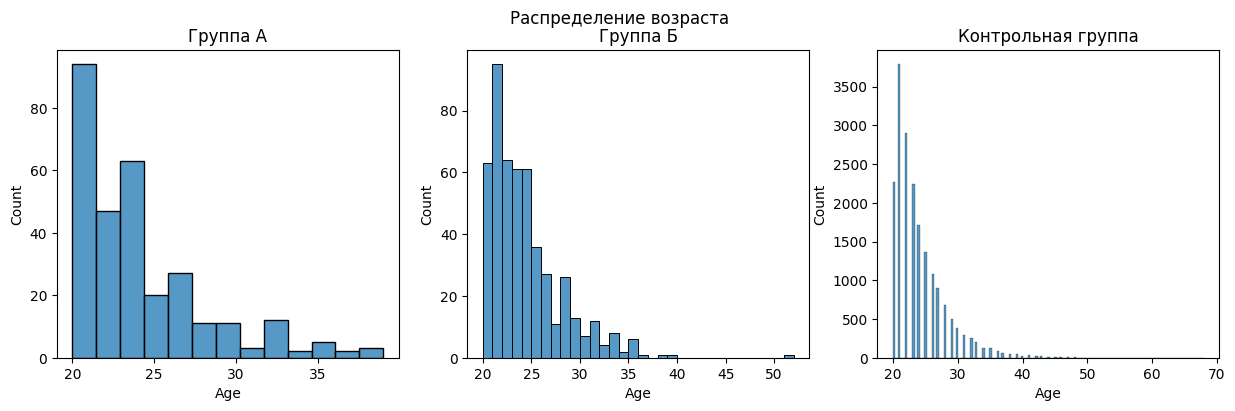

In [21]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
plt.suptitle('Распределение возраста')
sns.histplot(group_a['Age'], ax = ax[0])
sns.histplot(group_b['Age'], ax = ax[1])
sns.histplot(group_c['Age'], ax = ax[2])
ax[0].set_title('Группа А')
ax[1].set_title('Группа Б')
ax[2].set_title('Контрольная группа')
plt.show()

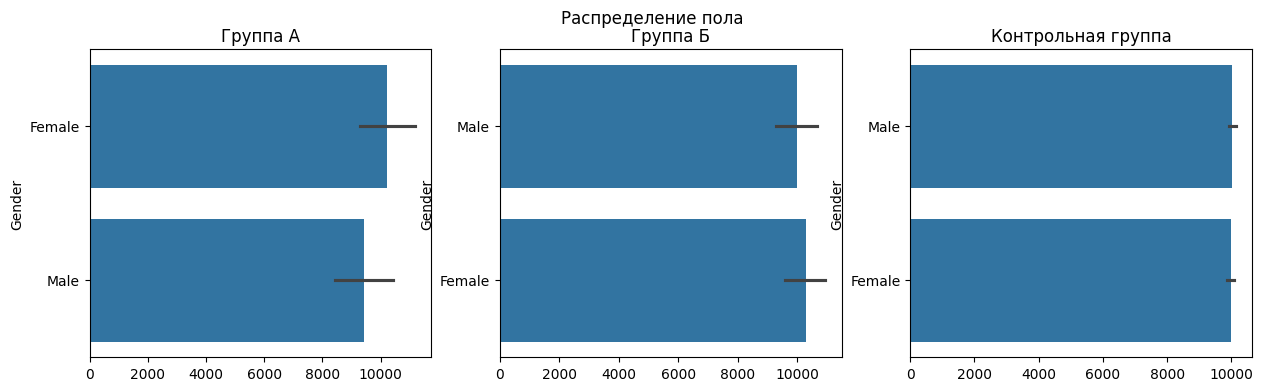

In [22]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
plt.suptitle('Распределение пола')
sns.barplot(group_a['Gender'], ax = ax[0])
sns.barplot(group_b['Gender'], ax = ax[1])
sns.barplot(group_c['Gender'], ax = ax[2])
ax[0].set_title('Группа А')
ax[1].set_title('Группа Б')
ax[2].set_title('Контрольная группа')
plt.show()

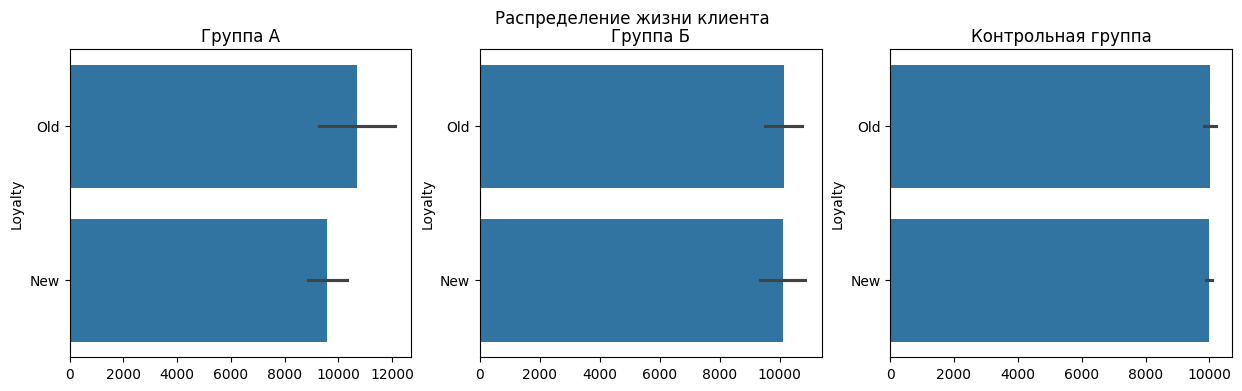

In [23]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
plt.suptitle('Распределение жизни клиента')
sns.barplot(group_a['Loyalty'], ax = ax[0])
sns.barplot(group_b['Loyalty'], ax = ax[1])
sns.barplot(group_c['Loyalty'], ax = ax[2])
ax[0].set_title('Группа А')
ax[1].set_title('Группа Б')
ax[2].set_title('Контрольная группа')
plt.show()

### Посмотрим на гетерогенность эффектов в группах А и В

In [24]:
group_a['Purchased'].fillna(0).sum()

np.float64(33.0)

In [25]:
group_a['Purchased'].fillna(0).count()

np.int64(300)

In [28]:
group_a['Purchased'].fillna(0).mean()

np.float64(0.11)

In [33]:
group_a['Purchased'] = group_a['Purchased'].fillna(0)
group_b['Purchased'] = group_b['Purchased'].fillna(0)

C:\Users\D\AppData\Local\Temp\ipykernel_11884\1518348992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['Purchased'] = group_a['Purchased'].fillna(0)
C:\Users\D\AppData\Local\Temp\ipykernel_11884\1518348992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['Purchased'] = group_b['Purchased'].fillna(0)


#### Распределение по полу

In [34]:
group_a.groupby('Gender')['Purchased'].mean()

Gender
Female    0.135714
Male      0.087500
Name: Purchased, dtype: float64

In [35]:
group_b.groupby('Gender')['Purchased'].mean()

Gender
Female    0.121339
Male      0.141762
Name: Purchased, dtype: float64

#### Распределение по лояльности

In [107]:
group_a.groupby('Loyalty')['Purchased'].mean()

Loyalty
New    0.0875
Old    0.2000
Name: Purchased, dtype: float64

In [108]:
group_b.groupby('Loyalty')['Purchased'].mean()

Loyalty
New    0.03
Old    0.20
Name: Purchased, dtype: float64

#### Распределение по возрасту

In [114]:
group_a.groupby('Age')['Purchased'].mean()

Age
20    0.076923
21    0.090909
22    0.106383
23    0.131579
24    0.080000
25    0.200000
26    0.100000
27    0.142857
28    0.090909
29    0.400000
30    0.166667
31    0.000000
32    0.100000
33    0.000000
34    0.000000
35    0.000000
37    0.000000
38    1.000000
39    0.000000
Name: Purchased, dtype: float64

In [115]:
group_b.groupby('Age')['Purchased'].mean()

Age
20    0.174603
21    0.126316
22    0.140625
23    0.147541
24    0.114754
25    0.111111
26    0.185185
27    0.181818
28    0.076923
29    0.153846
30    0.000000
31    0.166667
32    0.250000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
38    0.000000
39    0.000000
52    0.000000
Name: Purchased, dtype: float64

In [116]:
group_a.groupby('Age')['Purchased'].mean() - group_b.groupby('Age')['Purchased'].mean()

Age
20   -0.097680
21   -0.035407
22   -0.034242
23   -0.015962
24   -0.034754
25    0.088889
26   -0.085185
27   -0.038961
28    0.013986
29    0.246154
30    0.166667
31   -0.166667
32   -0.150000
33    0.000000
34    0.000000
35    0.000000
36         NaN
37         NaN
38    1.000000
39    0.000000
52         NaN
Name: Purchased, dtype: float64

### Проведем тест на значимость эффекта отдельно для мужчин

In [104]:
stats.ttest_ind(group_a[group_a['Gender'] == 'Male']['Purchased'], group_b[group_b['Gender'] == 'Male']['Purchased'])

TtestResult(statistic=np.float64(-1.6577548383765006), pvalue=np.float64(0.09811541281442289), df=np.float64(419.0))

### Проведем тест на значимость эффекта отдельно для женщин

In [106]:
stats.ttest_ind(group_a[group_a['Gender'] == 'Female']['Purchased'], group_b[group_b['Gender'] == 'Female']['Purchased'])

TtestResult(statistic=np.float64(0.4051470602068701), pvalue=np.float64(0.6855992158932249), df=np.float64(377.0))

### Проведем тест на значимость эффекта для новых клиентов

In [109]:
stats.ttest_ind(group_a[group_a['Loyalty'] == 'New']['Purchased'], group_b[group_b['Loyalty'] == 'New']['Purchased'])

TtestResult(statistic=np.float64(2.5146713413314856), pvalue=np.float64(0.012271570933336548), df=np.float64(438.0))

Нулевая гипотеза теста - это равенство средней конверсии в обеих группах новых клиентов

p-значение - это вероятность увидеть данную выборку при условии, что нулевая гипотеза верна (1,227%) 

Сравниваем р-значение с альфой = 5%

р-значение < 5% => отвергаем нулевую гипотезу

Конверсия в группе новых клиентов, которой показывали вариант рекламы А, и в группе новых клиентов, которой показывали вариант рекламы Б, отличаются!

Для более высокой конверсии новых клиентов рекомендуется показывать рекламу варианта А